# Machine Learning: Final Project

### Predicting Survival on the *Titanic*

The final project is intended to simulate participation in a Kaggle competition. Your challenge is to build the most accurate model for predicting which passangers would survive the sinking of the *Titanic*. The ***Titanic Machine Learning Final Project.ipynb*** Colab notebook provides some guidance for tackling the project and suggests some things to think about as you get started. However, many of the model-building decisions are left up to you. 
**Note**: Use comments in your code and text blocks to explain your decisions and results.

### Build a Pipeline for a Kaggle Competition!

Kaggle was started in 2010 as a platform for machine learning competitions, which aim to identify how best to optimize supervised learning problems. These initiatives offer a two-way benefit. They help companies improve their internal algorithms and they provide prospective data professionals opportunities to prove their worth.

Though Kaggle usually has a singular aim of maximizing a specific metric, the idea of finding the best possible algorithm and furthermore optimizing its hyperparameters is the daily task of a data scientist. Moreover, success in Kaggle can be great for a future resume (since your information is saved on their site).

Obviously, the timeframe for this lesson is not realistic in terms of a typical Kaggle workflow, as competitors spend weeks or even months optimizing every piece of an algorithm they can. However, you can get started with preliminary testing and use these principles to enter your own Kaggle competitions in the future!

# Step 1: Importing Libraries

It is best practice to import all libraries and packages early in the process.

You'll probably want to import Pandas plus some packages from scikit-learn.

| Type | Path | Regression | Classification |
| --- | --- | --- | --- |
| **Linear Models** | `sklearn.linear_model` | `LinearRegression` | `LogisticRegression` |
|  |  |`Ridge` | `RidgeClassifier` |
|  |  |`Lasso` |  |
| **K Nearest Neighbors** | `sklearn.neighbors` | `KNeighborsRegressor` | `KNeighborsClassifier` |
| **Support Vector Machines** | `sklearn.svm.` | `SVR` | `SVC` |
| **Naive Bayes** |  `sklearn.naive_Bayes` |  |`CategoricalNB` (Categorical) |
|  |  |  | `MultinomialNB` (Sentiment Analysis) |
| **Decision Trees** | `sklearn.tree` | `DecisionTreeRegressor` | `DecisionTreeClassifier` |
| **Ensemble - Random Forests** | `sklearn.ensemble` | `RandomForestRegressor` | `RandomForestClassifier`
| **Ensemble - Boosting** | `sklearn.ensemble` | `AdaBoostRegressor` | `AdaBoostClassifier` |
|  | `sklearn.ensemble` | `GradientBoostRegressor` | `GradientBoostClassifier` |



| Type | Path | Package |
| --- | --- | --- |
| Preprocessing | `sklearn.preprocessing` | `StandardScaler` |
| |`sklearn.preprocessing` | `MinMaxScaler` |
| |`sklearn.preprocessing` | `MaxAbsScaler` |
| Model Selection - Splitting| `sklearn.model_selection` | `train_test_split` |
| Model Selection - Grid Search | `sklearn.model_selection` | `GridSearchCV` |
| Model Selection - Scoring | `sklearn.model_selection` | `cross_val_score` |
| Metrics | `sklearn.metrics` | `confusion_matrix` |


**Note**: Use comments in your code and text blocks to explain your decisions and results.




In [ ]:
#Step 1
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.svm import SVC

#Step 2:  Load the `Titanic.csv` Data
You may want to refer back to one of your previous Colab notebooks to copy the Google Import code.

**Note**: Use comments in your code and text blocks to explain your decisions and results.

In [ ]:
#Step 2
from google.colab import files
Titanic = files.upload()


Saving Titanic.csv to Titanic.csv


In [ ]:
# create a datafrane using csv file
df_titanic = pd.read_csv('Titanic.csv')

# Check the first 5 rows
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Data Desciption** 
(from https://www.kaggle.com/c/titanic)


**Survived**: Survival (0 = No; 1 = Yes)

**Pclass**: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

**Name**: Name

**Sex**: Sex

**Age**: Age

**SibSp**: Number of Siblings/Spouses Aboard

**Parch**: Number of Parents/Children Aboard

**Ticket**: Ticket Number

**Fare**: Passenger Fare

**Cabin**: Cabin

**Embarked**: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

# Explore Dataset

In [ ]:
# Explore the dataset more, this will help us make decisions regarding missing data, null vlues, and feature selection

# display the number of rows and columns in dataset
display(df_titanic.shape)

print() # keeping a line between each code result for result clarity purpose

# display data type of each column values
display(df_titanic.dtypes)

print()
# display total number of null values in each columns
display(df_titanic.isna().sum())

print()
# display how many of each unique values exist in any column
display(df_titanic.describe(include = "all"))

(891, 12)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


**Based on the above results the following we can conclude the following:**
(these conclusions will be used in the next steps)

- the majority of the values in Cabin column are null values, so its better to not include this column as one of the features in the model as its very hard to impute
- there are two rows with null values in the Embarked column, this will not have a significant impact on the model so we can keep the column
- PassengerId columns should not be included in the model as it doesn't provide useful information to the model and may be mistakenly intupreted by the model as a ranked value
- Name column should not be included in the model as its a string and can't be encoded easily, this is since we will be using logistic regression for first model
- Ticket column has string vlaues and most of them are unique, so its hard to impute and we will not include it as one of the features

#Step 3: Split the Data

The next step is to separate the target column from the feature matrix and perform a train/test split. 

*   What is the target and what are the features in the data?
*   Are there any features that you want to drop?
*   Is there any feature engineering that you need to do?

**Note**: Use comments in your code and text blocks to explain your decisions and results.

 

In [ ]:
#Step 3

# The target will be Survived columns since we want to train the model to predict passenger survival
y = df_titanic['Survived']

# Based on the conclusions mentioned in Step 2 the following features will be dropped (Name, Ticket, Cabin, PassengerID) along with target column
X = df_titanic.drop(columns = ['Name', 'Ticket', 'Cabin', 'PassengerId', 'Survived'])

In [ ]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [ ]:
# Since we have string values in Sex and Embarked, we need to encode these columns, we will use one-hot encoding

one_hot = pd.get_dummies(data=X, columns=['Sex', 'Embarked'])

print(one_hot.head())

print(one_hot.columns)

X = pd.DataFrame(one_hot)

   Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  Embarked_C  \
0       3  22.0      1      0   7.2500           0         1           0   
1       1  38.0      1      0  71.2833           1         0           1   
2       3  26.0      0      0   7.9250           1         0           0   
3       1  35.0      1      0  53.1000           1         0           0   
4       3  35.0      0      0   8.0500           0         1           0   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1  
Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [ ]:
# split the data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Step 4: Clean and Preprocess the Data

Use the code block below to clean and preprocess your data. Some considerations you may want to think about include the following:  
*  Are there any missing values that need to be imputed?
*  Do you need to encode any categorical features?
*  Do you need to standardize any quantitative features?
 
**Note**: Use comments in your code and text blocks to explain your decisions and results.

 

In [ ]:
#Step 4

# Build a pipeline that will impute and standardize the data and fit a logistic regression model

pipe = Pipeline([
    ('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),#using simple imputer to impute the data
    ('scaler',StandardScaler()), # Standarize the data
    ('log_reg',LogisticRegression(random_state=0)) # we will use logistic regression for the baseline model
])

#Step 5: Build the Baseline Model

Ideally, you will want to set a baseline algorithm to build off of. The most logical start is *linear regression* for *regression* and *logistic regression* for *classification*, as they are the basis for their respective algorithms.

Once you have the baseline set, you will want to choose an algorithm that surpasses the baseline.

Select a baseline model and fit it to your data.

**Note**: Use comments in your code and text blocks to explain your decisions and results.



In [ ]:
# Step 5

# As shown from the pipeline used in Step 4, we are using Logistic Regression for the baseline model, we will now fit the data to the model
pipe.fit(X_train, y_train)

Pipeline(steps=[('imp_mean', SimpleImputer()), ('scaler', StandardScaler()),
                ('log_reg', LogisticRegression(random_state=0))])

#Step 6: Evaluate the Baseline Model

Use cross-validation to calculate the appropriate model evaluation metric. 

Is your model doing a good job fitting the data?  

If you have ideas for how to improve your model fit, go back and make those changes to earlier steps.

**Note**: Use comments in your code and text blocks to explain your decisions and results.


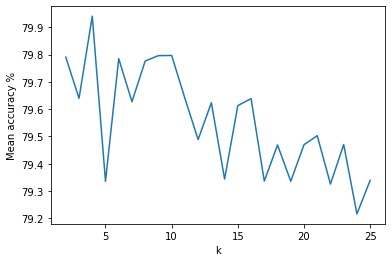

In [ ]:
#Step 6

# Using cross validation to evaluate the baseline model, we first need to find the best value for k

k = list(range(2,26))
mean_accuracy = []

for i in k:
  scores = cross_val_score(pipe, X_train, y_train, cv=i)
  mean_accuracy.append(scores.mean())


k_df = pd.DataFrame(k)
k_df.rename({0:'k'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([k_df, mean_accuracy_df], axis=1)

plt.plot(to_plot['k'], to_plot['mean accuracy'])
plt.xlabel('k')
plt.ylabel('Mean accuracy %')
plt.show()

In [ ]:
# from the chart, we notice that there is no significant difference, so lets just go with cv = 10

scores = cross_val_score(pipe, X_train, y_train, cv=10)
print(scores) # showing the accuracy for all 10 models

print('The training accuracy is', scores.mean()) # showing the mean accuracy of all 10
print('The standard deviation is',scores.std()) # showing the standard deviation of our score, which an indication of how consistant each model, the result shows that the results are only 0.076 away from each other on average

[0.88059701 0.70149254 0.82089552 0.88059701 0.82089552 0.74626866
 0.71641791 0.7761194  0.71212121 0.92424242]
The training accuracy is 0.7979647218453189
The standard deviation is 0.0755840374511861


In [ ]:
# lets check the accuracy with the test data
test_accuracy = pipe.score(X_test, y_test)
print('The testing accuracy is', test_accuracy) # the test accuracy is slightly better

The testing accuracy is 0.8071748878923767


# Step 7: Fit the Data to at Least One Other Model

Select one (or more) other appropriate model and use it to model the data. Calculate the cross-validation accuracy of each model. 

**Note**: Use comments in your code and text blocks to explain your decisions and results.

In [ ]:
#Step 7

# This time we will be using SVM with a radial basis function kernel as our model

# building a pipeline
rbf = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                ('scaler', StandardScaler()), 
                ('rbf', SVC(kernel='rbf'))])

# fitting the model
rbf.fit(X_train, y_train)

Pipeline(steps=[('imp_mean', SimpleImputer()), ('scaler', StandardScaler()),
                ('rbf', SVC())])

# Step 8: Evaluate Your Best Model

Evaluate your best model using the test set. 

*   Which model fit the data best?
*   What was the best accuracy you were able to achieve?  

**Note**: Use comments in your code and text blocks to explain your decisions and results.

In [ ]:
# Step 8

# Evaluating the model using cross validation with k = 10
rbf_scores = cross_val_score(rbf, X_train, y_train, cv=10)

print(rbf_scores) # showing the accuracy for all 10 models

print('The training accuracy is', rbf_scores.mean())  # showing the mean accuracy of all 10
print('The standard deviation is',rbf_scores.std()) # showing the standard deviation of our score

[0.82089552 0.73134328 0.86567164 0.89552239 0.86567164 0.76119403
 0.82089552 0.74626866 0.75757576 0.89393939]
The training accuracy is 0.8158977838082316
The standard deviation is 0.059855691009161126


In [ ]:
# lets check the accuracy with the test data
test_accuracy = rbf.score(X_test, y_test)
print('The testing accuracy is', test_accuracy) # the test accuracy is slightly better

The testing accuracy is 0.820627802690583


We notice that the accuracy of the SVM model is around 2% higher than the accuracy of the Logistic Regression model

#Step 9: Final Reporting

Summarize your model building process:  
* How did you identify the model target and features?  
* What steps did you take to prepare the data for modeling?  
* Which baseline model did you choose and why? How did you evaluate the model's performance?  
* Which other model(s) did you choose and why? How did you evaluate the model's performace?  
* What was the best model you developed? How well did the model perform on the test data?

#Step 9:

Identifying the model target and features was discussed in Step 2, to prepare the data for modeling we had to encode some of the features and drop others.
Logistic Regaression was choosen for the baseline model as it works better with classification compared to linear regaression, the baseline model was evaluted using the mean and standard devaition values.
For the other model, we used SVM with a radial basis function kernel, and evaluated it using the same method used for the baseline model.
SVM model performed slightly better than the Logistic Regression model, however the slight 2% differences may be significant for a life or death prediction.